In [1]:
import datetime as dt
import os
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math


def pull_stock_data(tickers:str, start:str, end:str, interval:str, stripdateindex:str, column:str) -> pd.DataFrame:
    """
    Returns a dataframe with chosen stock information for last day of the month.

    Parameters:
    -------------
    tickers (str): Yahoo finance tickers for companies divided ONLY by single space
    start (str): start date of the period (format yyyy-mm-dd)
    end (str): end date of the period (format yyyy-mm-dd)
    interval (str): wanted interval (1d, 1m, 1y)
    stripdateindex (str): argument for stripping datetime index down (d - day, m - month, y- year)
    columns (list): list of wanted values, args same as in yahoo finance
    """
    # data download
    df = yf.download(tickers = tickers, start = start, end = end, interval = interval, groupby = 'ticker')
    # changing index from datetime to just year and month
    df['Date'] = df.index
    dfg = df.groupby([df.index.year, df.index.month], as_index=False).last()
    dfg.reset_index(inplace=True, drop=True)
    dfg.set_index('Date', inplace=True)
    dfg.index = pd.to_datetime(dfg.index).to_period(stripdateindex)
    # dropping na rows
    dfg.dropna(inplace = True)
    return dfg[column]

    
def save_to_desktop(dataframe:pd.DataFrame, file_name:str):
    """
    Saves dataframe to desktop in csv format under filename provided

    Parameters:
    ------------
    dataframe (pd.DataFrame): dataframe that is to be saved
    file_name (str): name of the file
    """
    # defining path to desktop on running unit
    desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
    # saving file under chosen name on desktop
    dataframe.to_csv(desktop+'/'+file_name+'.csv', sep=';')



In [4]:
#tick = "BTC-USD ETH-USD XRP-USD ADA-USD SOL-USD DOGE-USD BUSD-USD MATIC-USD DOT-USD LTC-USD"
tick = 'BTC-USD ETH-USD XRP-USD'
st = '2000-12-01'
en = '2020-12-31'
intv = '1d'
strpdt = 'm'
col = ['Close', 'Volume']

dftest = pull_stock_data(tick, st, en, intv, strpdt, col)
dftest.head(5)

[*********************100%***********************]  3 of 3 completed


C:\Users\maxim\AppData\Local\Temp\ipykernel_1584\4046405710.py:33: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dfg.index = pd.to_datetime(dfg.index).to_period(stripdateindex)


Close                              Volume                \
              BTC-USD      ETH-USD   XRP-USD      BTC-USD       ETH-USD   
Date                                                                      
2017-11  10233.599609   447.114014  0.250878   8310689792  1.903040e+09   
2017-12  14156.400391   756.732971  2.300570  12136299520  2.554270e+09   
2018-01  10221.099609  1118.310059  1.162390   8041160192  3.757560e+09   
2018-02  10397.900391   855.198975  0.904583   6936189952  1.963980e+09   
2018-03   6973.529785   396.457001  0.512353   4553269760  1.323920e+09   

                       
              XRP-USD  
Date                   
2017-11  2.709070e+08  
2017-12  4.642080e+09  
2018-01  1.264030e+09  
2018-02  3.295300e+08  
2018-03  2.932080e+08

# Class 2 Problem set

In [5]:
dftt = dftest['Close']
dftt

,BTC-USD,ETH-USD,XRP-USD
Date,,,
2017-11,10233.599609,447.114014,0.250878
2017-12,14156.400391,756.732971,2.300570
2018-01,10221.099609,1118.310059,1.162390
2018-02,10397.900391,855.198975,0.904583
2018-03,6973.529785,396.457001,0.512353
2018-04,9240.549805,669.924011,0.837938
2018-05,7494.169922,577.645020,0.612622
2018-06,6404.000000,455.179993,0.466245
2018-07,7780.439941,433.867004,0.435225


## Question 1

In [3]:
# We only care about returns -
df1 = dftest['Close']
df1 = df1.pct_change()
df1.head()

,CAT,F,INTC,JPM,MKC,MSFT,NKE,UPS,WMT,XOM
Date,,,,,,,,,,
2000-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01,-0.065363,0.202773,0.230769,0.210234,0.010745,0.407781,-0.014379,0.053617,0.069176,-0.032063
2001-02,-0.059249,-0.013480,-0.228041,-0.151482,0.078189,-0.033777,-0.290493,-0.086753,-0.118134,-0.036839
2001-03,0.066827,0.011147,-0.078775,-0.037720,0.068448,-0.073093,0.033820,0.006545,0.008185,-0.000617
2001-04,0.131140,0.048364,0.174727,0.068597,-0.064063,0.238857,0.036183,0.009666,0.024554,0.093827


In [4]:
#save_to_desktop(dfsave, 'data')

#### Process F-F risk free rates downloaded previously

In [4]:
fama = pd.read_csv(r"F-F_Research_Data_Factors.CSV", sep=';')
fama['Date'] = pd.to_datetime(fama['Date'].astype('string'), format='%Y%m')
fama.set_index('Date', inplace=True)
fama.index = fama.index.to_period('m')
# Values given in CSV are plain percentages - division by 100
fama = fama.divide(100)
fama.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031


In [5]:
# Join risk free rates to stock returns in periods
dffull = pd.merge(df1,fama, how='left', left_index=True, right_index=True)
# drop first NULL row which is causing regression to fail
dffull = dffull.dropna()

In [6]:
# Calculate excess stock return for each company
for i in dffull.columns.tolist()[:10]:
    dffull[i+'_re'] = dffull[i]-dffull['RF']
# Calculate excess Market return
dffull['reM'] = dffull['Mkt-RF']-dffull['RF']
dffull.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 240 entries, 2001-01 to 2020-12
Freq: M
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CAT      240 non-null    float64
 1   F        240 non-null    float64
 2   INTC     240 non-null    float64
 3   JPM      240 non-null    float64
 4   MKC      240 non-null    float64
 5   MSFT     240 non-null    float64
 6   NKE      240 non-null    float64
 7   UPS      240 non-null    float64
 8   WMT      240 non-null    float64
 9   XOM      240 non-null    float64
 10  Mkt-RF   240 non-null    float64
 11  SMB      240 non-null    float64
 12  HML      240 non-null    float64
 13  RF       240 non-null    float64
 14  CAT_re   240 non-null    float64
 15  F_re     240 non-null    float64
 16  INTC_re  240 non-null    float64
 17  JPM_re   240 non-null    float64
 18  MKC_re   240 non-null    float64
 19  MSFT_re  240 non-null    float64
 20  NKE_re   240 non-null    float64
 2

#### Regress Excess Stock returns (<STOCK_NAME>_re) on Excess Market returns (reM)
* intercept is the Alpha 
* coefficient for reM is the company's Beta


In [7]:
def get_significance(pvalue):
    '''
    Helper function to make p-value visual with use of stars
    '''
    if pvalue > 0.1: return ''
    elif pvalue > 0.05: return '*'
    elif pvalue> 0.01: return '**'
    else: return '***'


In [8]:
def reg_it(df:pd.DataFrame, cols):
    # Exog variable is constant - it's always Excess Market return
    X = sm.add_constant(df['reM'])
    # Store results in dict
    reg_results = {}
    for stock in cols:
        y = df[stock]
        reg_model = sm.OLS(y, X).fit(cov_type='HC3')
        CAPM_params = {'AVG_excess_return' : y.mean(), 
            "alpha" : reg_model.params[0], # In Excel it's in %, but I'd rather keep it as fraction here for further calculations 
            "beta" : reg_model.params[1],
            "beta_pvalue" : get_significance(reg_model.pvalues[1]),
            "R2adj" : reg_model.rsquared_adj,
        }
        reg_results[stock[:-3]] = CAPM_params

    results_df = pd.DataFrame.from_dict(reg_results, orient='index')
    # Save it to .csv in our folder (you can copy from this output dataframe and paste to excel directly tough...)
    # results_df.to_csv('Q1_results.csv', sep=';')
    return results_df

In [63]:
colsreg = [x for x in dffull.columns.tolist() if '_re' in x]

results_df = reg_it(dffull, colsreg)
display(results_df)


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.011259,0.004257,1.318228,***,0.461642
F,0.003513,-0.005400,1.678019,***,0.289176
INTC,0.005094,-0.001265,1.197149,***,0.353397
JPM,0.006734,-0.000202,1.305788,***,0.489124
MKC,0.009868,0.008069,0.338575,***,0.097466
MSFT,0.011207,0.006089,0.963456,***,0.349710
NKE,0.013655,0.009598,0.763648,***,0.277536
UPS,0.005042,0.000963,0.768040,***,0.327946
WMT,0.004354,0.002290,0.388600,***,0.114213
XOM,0.000399,-0.003497,0.733508,***,0.323427


**Comment**<br>
Fit is at 30-40%, not great but not terrible. JPM is more volatile than the market in the 20 year period on other hand MKC is much less volatile than the market. 4 stocks in the portfolio are more volatile than the market, 6 are less or almost at the same level of volatility as the market.

#### Estimate SML
* regress Average Excess Stock returns on estimated market Betas for each stock
* we obtain lambda_0 (constant) and lambda_1 (price of risk)

In [80]:
# for whole
SML_model = sm.OLS(results_df['AVG_excess_return'], sm.add_constant(results_df['beta'])).fit(cov_type='HC3')
print(f'''
    lambda_0 : {SML_model.params[0]},
    lambda_1 : {SML_model.params[1]},
    R2_adj : {SML_model.rsquared_adj}
'''
)


    lambda_0 : 0.007795225145643754,
    lambda_1 : -0.0007221373275028279,
    R2_adj : -0.11886624814672841



**Comment on comparison** <br>
Avg market excess return: 0,7% (realized price of risk)
Lambda1: -0,07%

Lambda1 is not significant whis is not surprising having in mind that our portfolio consists of only 10 different companies. The estimated price of risk is 0 while realized was 0,7%.

## Question 2
*Repeat your analysis (as in Question 1) for each of the four 5-year periods. For a selected company andfor the EW portfolio, compare the dynamics of the market beta over the 5-year periods. What can you sayabout the stability of your estimates (specifically the market beta)?*

### Dividing dataframe into 4 parts and applying regression for all of them

In [13]:

todiv = len(dffull)
p1, p2, p3, p4, p5 = np.linspace(1,todiv, 5)
dfq1 = dffull.iloc[0:math.floor(p2),:]
dfq2 = dffull.iloc[math.ceil(p2):math.floor(p3)]
dfq3 = dffull.iloc[math.ceil(p3):math.floor(p4)]
dfq4 = dffull.iloc[math.ceil(p4):math.floor(p5)]

q1result = reg_it(dfq1, colsreg) 
q2result = reg_it(dfq2, colsreg)
q3result = reg_it(dfq3, colsreg)
q4result = reg_it(dfq4, colsreg)

display(q1result)
display(q2result)
display(q3result)
display(q4result)

,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.016296,0.017515,1.172017,***,0.418654
F,-0.013186,-0.011587,1.538126,***,0.310445
INTC,0.004140,0.006425,2.197739,***,0.529581
JPM,0.000513,0.002182,1.604358,***,0.567111
MKC,0.008388,0.008483,0.091531,,-0.009738
MSFT,0.005173,0.006346,1.128144,***,0.290870
NKE,0.008017,0.008739,0.693887,***,0.199149
UPS,0.003422,0.003944,0.501956,***,0.216576
WMT,-0.002172,-0.001550,0.597625,***,0.194135
XOM,0.003909,0.004485,0.553664,***,0.195805


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.010271,0.010652,1.687301,***,0.614783
F,0.031069,0.031617,2.434411,***,0.303452
INTC,0.001156,0.001408,1.114522,***,0.550812
JPM,0.003961,0.004211,1.108946,***,0.352328
MKC,0.006727,0.006820,0.411305,***,0.183564
MSFT,0.001256,0.001491,1.042016,***,0.455140
NKE,0.013241,0.013442,0.893938,***,0.459529
UPS,0.000070,0.000255,0.820599,***,0.385578
WMT,0.001967,0.002034,0.294592,**,0.091863
XOM,0.002038,0.002134,0.424136,***,0.186205


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,-0.003020,-0.018809,1.590992,***,0.496348
F,0.000464,-0.012442,1.300574,***,0.383284
INTC,0.009954,0.001678,0.833976,***,0.205500
JPM,0.009398,-0.006470,1.598960,***,0.556801
MKC,0.012000,0.006879,0.516056,***,0.198761
MSFT,0.013728,0.005229,0.856454,***,0.212506
NKE,0.020827,0.014833,0.603966,***,0.105928
UPS,0.005908,-0.002666,0.863951,***,0.498387
WMT,0.002638,0.000216,0.244055,,0.014702
XOM,0.000352,-0.008272,0.869019,***,0.475517


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.019886,0.008037,0.900791,***,0.321866
F,-0.002222,-0.017926,1.193801,***,0.420028
INTC,0.009316,0.000873,0.641880,***,0.162628
JPM,0.014220,-0.000749,1.137931,***,0.568338
MKC,0.013705,0.008421,0.401739,**,0.093206
MSFT,0.024336,0.014342,0.759783,***,0.432515
NKE,0.015243,0.004640,0.806048,***,0.319255
UPS,0.011928,-0.000156,0.918648,***,0.282991
WMT,0.013555,0.007993,0.422825,**,0.140558
XOM,-0.008395,-0.025724,1.317405,***,0.614988


* ### Plotting difference between one comapny and whole portfolio

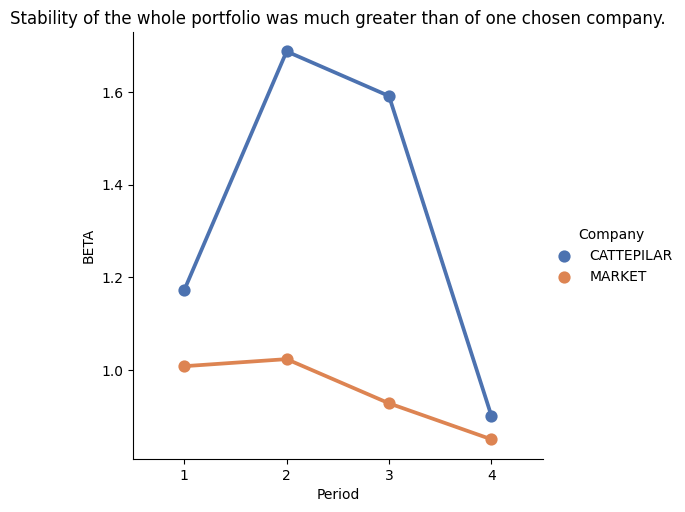

In [14]:
dfplot = {'Period':[1,2,3,4, 1,2,3,4], 'Company':['CATTEPILAR','CATTEPILAR','CATTEPILAR','CATTEPILAR', 'MARKET', 'MARKET', 'MARKET', 'MARKET'] ,'BETA':[q1result.iloc[0, 2], q2result.iloc[0, 2], q3result.iloc[0, 2], q4result.iloc[0, 2], q1result['beta'].mean(), q2result['beta'].mean(), q3result['beta'].mean(), q4result['beta'].mean()]}
dfplot = pd.DataFrame(dfplot)

sns.catplot(x='Period', y='BETA', hue='Company' , data=dfplot, kind='point', palette = 'deep')
plt.title('Stability of the whole portfolio was much greater than of one chosen company.')
plt.show()

## Question 3
*For each company and for the Equally-Weighted (EW) portfolio of the 10 stocks. estimate the basic perfor-mance measures for the 20-year period and discuss their meaning. Break them also into four 5-year periodsand discuss how the performance was changing over time. Finally, for the EW portfolio, plot how the valueof 1$ invested into this portfolio changes over time and what is its value after the 20 years.*

### Calculating performance metrics

MEASURES:
* Sharpe - (return-rf)/std
* Jenson's alpha - portfolio_return/(rf + Beta(return of market rf rate of return))

Ponizej jest policzone sharpe, traynor i jensens dla całego periodu i 5-letnich okresów za pomocą funkcji calc_perf. Jensens alpha wziąłem z regresji liniowej, tak samo jak betę do policzenia treynora

In [15]:
def calc_perf(df, reg_df):
    '''
    Function calculating performance metrics 
    
    Parameters:
    df -> dataframe with stock excess returns
    reg_df -> regressions output dataframe with alphas and betas for each stock
    '''

    # create an empty list to be filled with sharpe ratio
    sr = list()
    tr = list()

    # loop through stock excess returns and calculate Sharpe ratio and Treynor ratio for each, append to list. Jensens alpha will be just the intercept from the reg_df
    for i in df.columns.tolist()[:10]:
        sr.append(
            df[i+'_re'].mean() / np.std(df[i+'_re'])
            )   
        tr.append(
            df[i+'_re'].mean() / reg_df.loc[i, "beta"]
            )

    return [sr, tr, list(reg_df['alpha'].values)]

In [16]:
def calc_portfolio_perf(df, reg_df):
    '''
    Function calculating performance metrics for EW portfolio
    
    Parameters:
    df -> dataframe with stock excess returns
    reg_df -> regressions output dataframe with alphas and betas for each stock
    '''
    ew_rets = df.filter(regex='_re').sum(1) / 10

    sr = ew_rets.mean() / np.std(ew_rets)
    tr = ew_rets.mean() / reg_df["beta"].mean()
    ja = reg_df["alpha"].mean()

    return [sr, tr, ja]



In [17]:
# calculate preformance metrics using created function
res_all = calc_perf(dffull, results_df)
res_q1 = calc_perf(dfq1, q1result)
res_q2 = calc_perf(dfq2, q2result)
res_q3 = calc_perf(dfq3, q3result)
res_q4 = calc_perf(dfq4, q4result)

# create df with calculated data
dfperform_all = pd.DataFrame(data=np.transpose(res_all), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])
dfperform_q1 = pd.DataFrame(data=np.transpose(res_q1), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])
dfperform_q2 = pd.DataFrame(data=np.transpose(res_q2), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])
dfperform_q3 = pd.DataFrame(data=np.transpose(res_q3), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])
dfperform_q4 = pd.DataFrame(data=np.transpose(res_q4), index=q1result.index, columns=['sharpeRatio', 'treynorRatio', 'jensensAlpha'])

print("performance metrics for 2001-2020")
display(dfperform_all)
print("performance metrics for 2001-2005")
display(dfperform_q1)
print("performance metrics for 2006-2010")
display(dfperform_q2)
print("performance metrics for 2011-2015")
display(dfperform_q3)
print("performance metrics for 2016-2020")
display(dfperform_q4)


performance metrics for 2001-2020


,sharpeRatio,treynorRatio,jensensAlpha
CAT,0.128534,0.008541,0.004257
F,0.025006,0.002094,-0.005400
INTC,0.056103,0.004255,-0.001265
JPM,0.079869,0.005157,-0.000202
MKC,0.204898,0.029144,0.008069
MSFT,0.152575,0.011632,0.006089
NKE,0.209269,0.017881,0.009598
UPS,0.083425,0.006565,0.000963
WMT,0.085008,0.011204,0.002290
XOM,0.006868,0.000544,-0.003497


performance metrics for 2001-2005


,sharpeRatio,treynorRatio,jensensAlpha
CAT,0.205602,0.013904,0.017515
F,-0.109913,-0.008573,-0.011587
INTC,0.031196,0.001884,0.006425
JPM,0.005476,0.000320,0.002182
MKC,0.177790,0.091644,0.008483
MSFT,0.057004,0.004585,0.006346
NKE,0.120376,0.011554,0.008739
UPS,0.073828,0.006817,0.003944
WMT,-0.037415,-0.003634,-0.001550
XOM,0.072982,0.007060,0.004485


performance metrics for 2006-2010


,sharpeRatio,treynorRatio,jensensAlpha
CAT,0.091560,0.006087,0.010652
F,0.136768,0.012762,0.031617
INTC,0.014794,0.001037,0.001408
JPM,0.041085,0.003572,0.004211
MKC,0.138729,0.016355,0.006820
MSFT,0.015675,0.001205,0.001491
NKE,0.193513,0.014812,0.013442
UPS,0.001023,0.000085,0.000255
WMT,0.041778,0.006678,0.002034
XOM,0.041033,0.004806,0.002134


performance metrics for 2011-2015


,sharpeRatio,treynorRatio,jensensAlpha
CAT,-0.038536,-0.001898,-0.018809
F,0.006401,0.000357,-0.012442
INTC,0.159639,0.011936,0.001678
JPM,0.126147,0.005878,-0.006470
MKC,0.306276,0.023253,0.006879
MSFT,0.217728,0.016029,0.005229
NKE,0.343156,0.034484,0.014833
UPS,0.139095,0.006838,-0.002666
WMT,0.054965,0.010808,0.000216
XOM,0.008047,0.000405,-0.008272


performance metrics for 2016-2020


,sharpeRatio,treynorRatio,jensensAlpha
CAT,0.276042,0.022077,0.008037
F,-0.026426,-0.001861,-0.017926
INTC,0.132228,0.014514,0.000873
JPM,0.205284,0.012496,-0.000749
MKC,0.243664,0.034114,0.008421
MSFT,0.461193,0.032031,0.014342
NKE,0.235549,0.018911,0.004640
UPS,0.152774,0.012984,-0.000156
WMT,0.273574,0.032057,0.007993
XOM,-0.108770,-0.006372,-0.025724


In [18]:
# calculate preformance metrics using created function
from operator import index


por_all = calc_portfolio_perf(dffull, results_df)
por_q1 = calc_portfolio_perf(dfq1, q1result)
por_q2 = calc_portfolio_perf(dfq2, q2result)
por_q3 = calc_portfolio_perf(dfq3, q3result)
por_q4 = calc_portfolio_perf(dfq4, q4result)

# create df with calculated data
print("performance metrics for 2001-2020")
display(pd.DataFrame(data=por_all, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))
print("performance metrics for 2001-2005")
display(pd.DataFrame(data=por_q1, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))
print("performance metrics for 2006-2010")
display(pd.DataFrame(data=por_q2, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))
print("performance metrics for 2011-2015")
display(pd.DataFrame(data=por_q3, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))
print("performance metrics for 2016-2020")
display(pd.DataFrame(data=por_q4, index=['sharpeRatio', 'treynorRatio', 'jensensAlpha']))

performance metrics for 2001-2020


,0
sharpeRatio,0.147335
treynorRatio,0.007522
jensensAlpha,0.002090


performance metrics for 2001-2005


,0
sharpeRatio,0.069021
treynorRatio,0.003423
jensensAlpha,0.004498


performance metrics for 2006-2010


,0
sharpeRatio,0.117665
treynorRatio,0.007013
jensensAlpha,0.007406


performance metrics for 2011-2015


,0
sharpeRatio,0.198537
treynorRatio,0.007787
jensensAlpha,-0.001982


performance metrics for 2016-2020


,0
sharpeRatio,0.260860
treynorRatio,0.013125
jensensAlpha,-0.000025


### Ploting the change of 1 dollar value in the portfolio over time  

Text(0, 0.5, '$ Value')

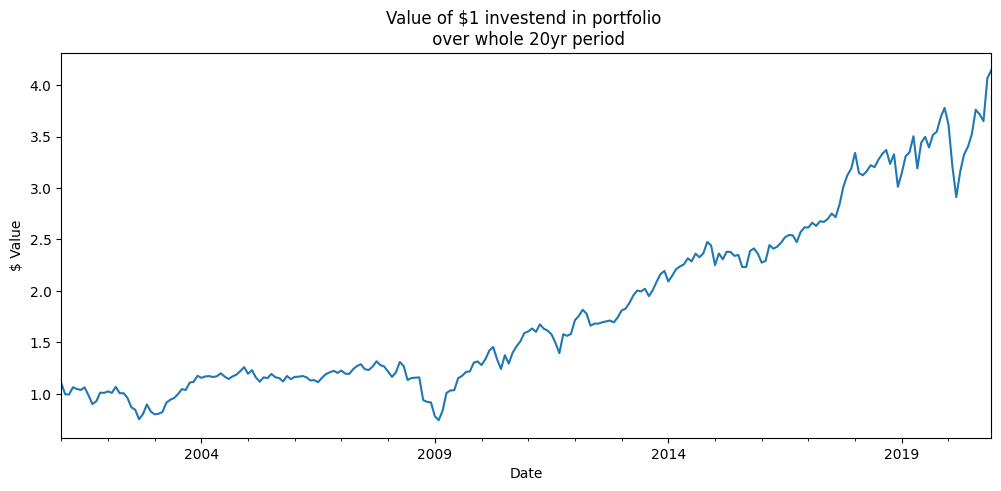

In [19]:
((1 + dffull.filter(regex='_re').sum(1) / 10).cumprod()).plot(figsize=(12,5))
plt.title('Value of $1 investend in portfolio \n over whole 20yr period')
plt.ylabel('$ Value')

# Question 4 (optional)

Calculate rolling 5-year Betas for all companies

Text(0.5, 1.0, 'Rolling Betas for each company over 20 year period')

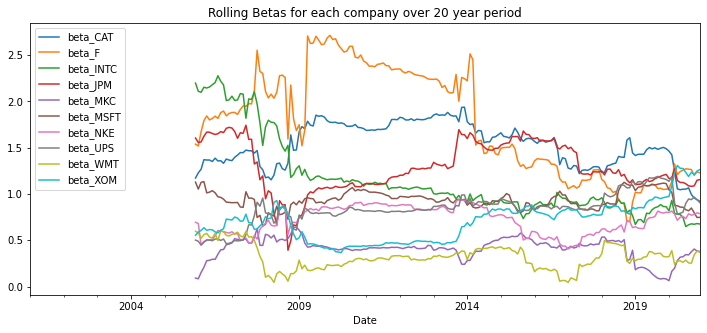

In [78]:
rolling_betas = []
colsreg = [x for x in dffull.columns.tolist() if '_re' in x]

for stock in colsreg:
    # calculate covariance matrix between stock and market for each rolling window of 5 years
    cov_matrix = dffull[[stock, 'reM']].rolling(60).cov() 
    # Divide Covariance of stock and Market Return by Market Return Variance (stupid inherited naming in cov matrix)
    cov_matrix['beta_' + stock[:-3]]= cov_matrix[stock] / cov_matrix['reM']
    # Extract the cross section (.xs()) of each period where the Beta is located (position [1,1] = reM, 1)
    rolling_betas.append(cov_matrix.xs('reM', level=1, axis=0)['beta_' + stock[:-3]])

df_roll_betas = pd.concat(rolling_betas, axis=1)

df_roll_betas.plot(figsize=(12,5))
plt.title('Rolling Betas for each company over 20 year period')
